In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("bank.csv", delimiter=";")

In [3]:
df.shape

(4521, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# check for nan/null
df.isnull().values.any()

False

In [6]:
# drop duplicates
len(df.drop_duplicates())

4521

In [7]:

# duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
df.drop(columns='duration', inplace=True)

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [9]:
enc = LabelEncoder()
enc.fit(y)
y = enc.transform(y)

In [10]:
column_trans = ColumnTransformer(transformers=
        [('num', MinMaxScaler(), selector(dtype_exclude="object")),
        ('cat', OneHotEncoder(), selector(dtype_include="object"))],
        remainder='drop')

In [11]:
def get_models():
    models = dict()
    
    models['Logistic Regression'] = Pipeline([('prep', column_trans), 
                                              ('model', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))])
    
    models['Decision Tree'] = Pipeline([('prep', column_trans), 
                                        ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
    
    models['Random Forest'] = Pipeline([('prep', column_trans), 
                                        ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))])
    
    models['Extra Trees'] = Pipeline([('prep', column_trans), 
                                      ('model', ExtraTreesClassifier(random_state=42, class_weight='balanced'))])
    
    models['Gradient Boosting'] = Pipeline([('prep', column_trans), 
                                            ('model', GradientBoostingClassifier(random_state=42))])
    
    models['Hist Gradient Boosting'] = Pipeline([('prep', column_trans), 
                                                 ('model', HistGradientBoostingClassifier(random_state=42))])
    
    models['AdaBoost'] = Pipeline([('prep', column_trans), 
                                   ('model', AdaBoostClassifier(random_state=42))]) 
    
    models['SGD'] = Pipeline([('prep', column_trans), 
                              ('model', SGDClassifier(random_state=42, class_weight='balanced'))])
    
    models['SVC'] = Pipeline([('prep', column_trans), 
                              ('model', SVC(class_weight='balanced', random_state=42))])
    
    models['Nearest Neighbor'] = Pipeline([('prep', column_trans), 
                                           ('model', KNeighborsClassifier(3))])
    
    models['Perceptron'] = Pipeline([('prep', column_trans), 
                                     ('model', Perceptron(random_state=42))])
    
    return models

In [12]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

CPU times: user 158 ms, sys: 72.5 ms, total: 231 ms
Wall time: 1.91 s
* Logistic Regression Score = 0.721 StdDev = (0.025) 

CPU times: user 92.4 ms, sys: 11 ms, total: 103 ms
Wall time: 218 ms
* Decision Tree Score = 0.573 StdDev = (0.021) 

CPU times: user 169 ms, sys: 17.6 ms, total: 187 ms
Wall time: 1.64 s
* Random Forest Score = 0.730 StdDev = (0.024) 

CPU times: user 146 ms, sys: 15.3 ms, total: 161 ms
Wall time: 1.76 s
* Extra Trees Score = 0.701 StdDev = (0.021) 

CPU times: user 145 ms, sys: 14.6 ms, total: 160 ms
Wall time: 2.46 s
* Gradient Boosting Score = 0.756 StdDev = (0.021) 

CPU times: user 183 ms, sys: 16.7 ms, total: 200 ms
Wall time: 1.85 s
* Hist Gradient Boosting Score = 0.728 StdDev = (0.021) 

CPU times: user 121 ms, sys: 12.6 ms, total: 133 ms
Wall time: 803 ms
* AdaBoost Score = 0.733 StdDev = (0.023) 

CPU times: user 104 ms, sys: 10.7 ms, total: 115 ms
Wall time: 197 ms
* SGD Score = 0.690 StdDev = (0.031) 

CPU times: user 158 ms, sys: 16.6 ms, total: 17

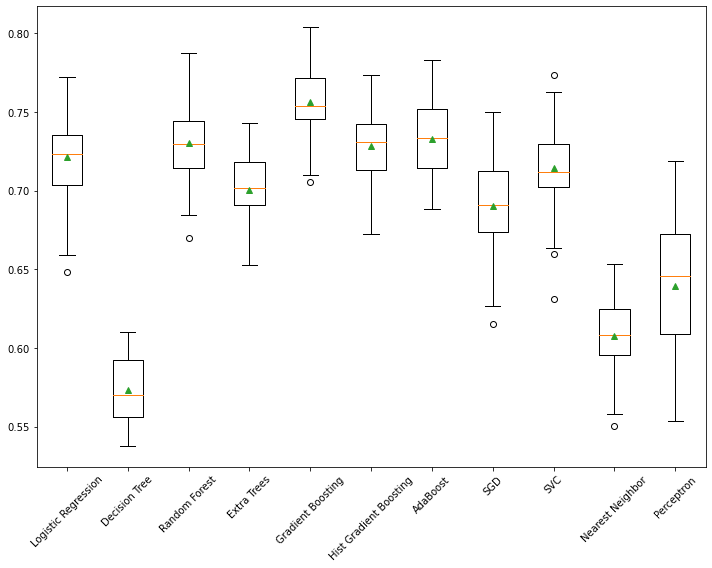

In [13]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names, time = list(), list(), list()
for name, model in models.items():
    %time scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('* %s Score = %.3f StdDev = (%.3f)' % (name, np.mean(scores), np.std(scores)), '\n')

# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('modelselection_01.png', dpi=300)